In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path='Fruits_Vegetables/train'
data_test_path='Fruits_Vegetables/test'
data_val_path='Fruits_Vegetables/validation'

In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [5]:
data_test=tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


In [6]:
data_cat= data_train.class_names

In [7]:
data_val=tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 351 files belonging to 36 classes.


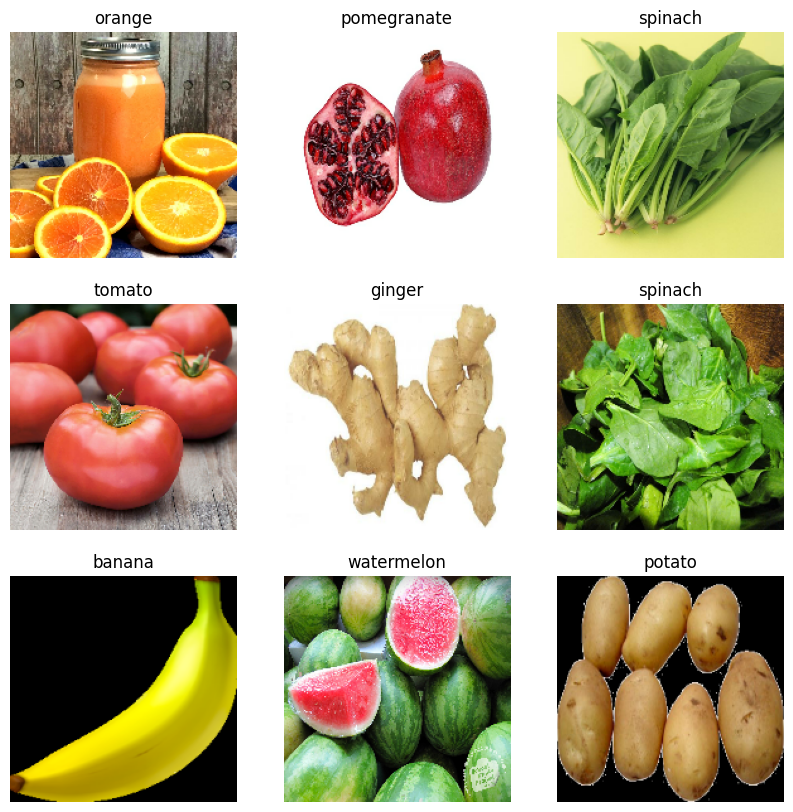

In [8]:
plt.figure(figsize=(10,10))
for image, lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[lables[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model= Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])


In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 425ms/step - accuracy: 0.0983 - loss: 3.6000 - val_accuracy: 0.3276 - val_loss: 2.3865
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.2991 - loss: 2.4142 - val_accuracy: 0.6211 - val_loss: 1.3664
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.4797 - loss: 1.7835 - val_accuracy: 0.7692 - val_loss: 0.9018
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 389ms/step - accuracy: 0.6797 - loss: 1.1483 - val_accuracy: 0.8519 - val_loss: 0.5609
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 387ms/step - accuracy: 0.8111 - loss: 0.6647 - val_accuracy: 0.9174 - val_loss: 0.3434
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.8837 - loss: 0.4376 - val_accuracy: 0.9288 - val_loss: 0.3033
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 385ms/step - accuracy: 0.9333 - loss: 0.2741 - val_accuracy: 0.9402 - val_loss: 0.3088
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 328ms/step - accuracy: 0.9385 - loss: 0.2294 - val_accu

In [ ]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [ ]:
image = 'pa.jpeg'
image = tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict=model.predict(img_bat)

In [ ]:
score=tf.nn.softmax(predict)

In [ ]:
print('fruit in image {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

In [ ]:
model.save('Fruit_k.keras')